In [205]:
import pandas as pd
import time
import numpy as np
import struct
import matplotlib.pyplot as plt
from cr_data_inspection_functions import *
from lwa_antpos import mapping
from scipy.optimize import curve_fit
import scipy.stats as st
import math
import yaml



##load arraymap
array_map=pd.read_csv('array-map-5-22-2023.csv')
xdict={}
ydict={}
zdict={}
for i,n in enumerate(array_map['antname']):
    xdict[n]=array_map['x'][i]
    ydict[n]=array_map['y'][i]
    zdict[n]=array_map['elevation'][i]
arraymapdictionaries=[xdict,ydict,zdict]

h= np.asarray([0.000049291111379545783611425685544205066,
               0.012255497574972781804625299173494568095,
               0.085289616177628382875930412865272955969,
               -0.063136263203890236050952466939634177834,
               -0.021489412960359111082198069198057055473,
               -0.067555957743183181474222465112688951194,
               -0.017706118779731286339007567676162580028,
               0.080882151494431037130894424080906901509,
               -0.014358148251631907416081546102759602945,
               0.093835202832724035060252276707615237683,
               -0.280577771800571862392814637132687494159,
               -0.129748808680352711864003367736586369574,
               0.501393724111570460166831253445707261562,
               -0.129748808680352711864003367736586369574,
               -0.280577771800571862392814637132687494159,
               0.093835202832724035060252276707615237683,
               -0.014358148251631907416081546102759602945,
               0.080882151494431037130894424080906901509,
               -0.017706118779731286339007567676162580028,
               -0.067555957743183181474222465112688951194,
               -0.021489412960359111082198069198057055473,
               -0.063136263203890236050952466939634177834,
               0.085289616177628382875930412865272955969,
               0.012255497574972781804625299173494568095,
               0.000049291111379545783611425685544205066])

Simulated pulses were added to the timeseries before processing through  the first cuts code.

In [206]:
summary_filename='/home/ubuntu/kp/data/2023July3-overnight-software-trigger/simulation-summary.txt'
summary_filenames=[summary_filename]

colnames=['fname',
          'config',
          'total_event_count',
          'complete_events_count',
          'incomplete_events_count',
          'scrambled_complete_events',
          'pass_rms_change_cut',
          'pass_veto_cut',
          'pass_max_distant_vs_core_cut',
          'pass_top5_distant_vs_core_cut',
          'pass_distant_vs_core_cut2',
          'total_selected_v1',
          'total_selected_v2']

all_lines=[]
for summary_filename in summary_filenames:
    with open(summary_filename) as file:
        lines = [line.rstrip().split() for line in file if line[:2]=='ov']
    all_lines+=lines
    
summary = pd.DataFrame(columns=colnames,index=range(len(all_lines)))
for j,line in enumerate(all_lines):
    for i in range(len(line)):
        if i>1: #skip the first 2
            line[i]=int(line[i])
    summary.loc[j]=line
            

In [232]:
summary.keys()


Index(['fname', 'config', 'total_event_count', 'complete_events_count',
       'incomplete_events_count', 'scrambled_complete_events',
       'pass_rms_change_cut', 'pass_veto_cut', 'pass_max_distant_vs_core_cut',
       'pass_top5_distant_vs_core_cut', 'pass_distant_vs_core_cut2',
       'total_selected_v1', 'total_selected_v2'],
      dtype='object')

In [234]:
print(np.sum(summary['incomplete_events_count']))
Apolfiles=np.asarray([string[-5]=='A' for string in summary['config']])
Bpolfiles=np.asarray([string[-5]=='B' for string in summary['config']])
nosignal=np.asarray([string[-12:-4]=='no-pulse' for string in summary['config']])
pulses=np.zeros(len(summary['config']))
pulses[1:]=np.asarray([(string[-8:-5]) for string in summary['config'][1:]])
print(pulse)
print(Apolfiles)
print(Bpolfiles)
#print(summary['pass_rms_change_cut']['Apolfiles'])
#print(summary['pass_rms_change_cut']['Bpolfiles'])
#print(summary['pass_veto_cut'][Bpolfiles])
#print(summary['pass_veto_cut'][Apolfiles])
print(summary['pass_veto_cut'])


#print(summary['complete_events_count'][Apolfiles])
#print(summary['complete_events_count'][Bpolfiles])
#print(summary['complete_events_count'][Bpolfiles])
#print(summary['complete_events_count'][Apolfiles])

0
500
[False  True False  True False  True False  True False  True False]
[False False  True False  True False  True False  True False  True]
0     998
1     998
2     998
3     998
4     998
5     998
6     998
7     998
8     998
9     998
10    998
Name: pass_veto_cut, dtype: object


In [235]:
996/1000

0.996

Text(0.5, 1.0, 'Version 2 total cut')

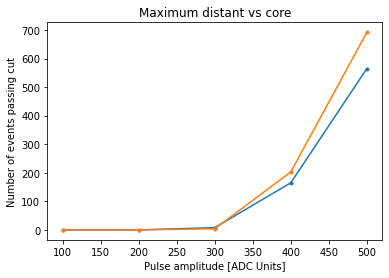

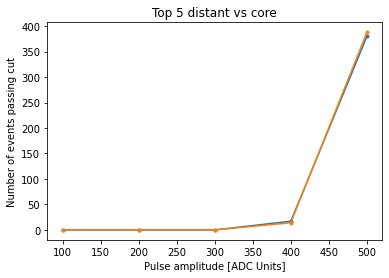

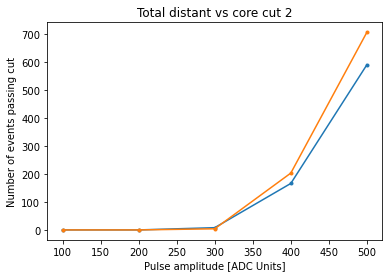

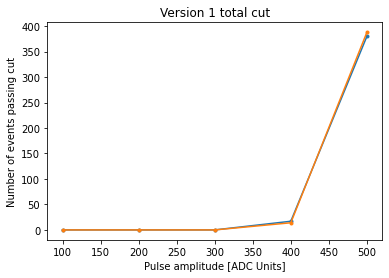

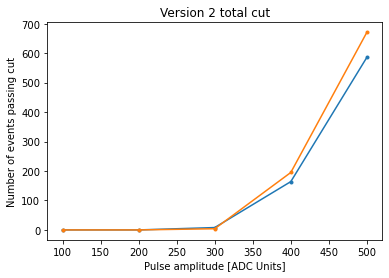

In [208]:
plt.figure()
plt.plot(pulses[Apolfiles],(summary['pass_max_distant_vs_core_cut'][Apolfiles]),'.-')
plt.plot(pulses[Bpolfiles],(summary['pass_max_distant_vs_core_cut'][Bpolfiles]),'.-')
plt.xlabel('Pulse amplitude [ADC Units]')
plt.ylabel('Number of events passing cut')
plt.title('Maximum distant vs core')

plt.figure()
plt.plot(pulses[Apolfiles],(summary['pass_top5_distant_vs_core_cut'][Apolfiles]),'.-')
plt.plot(pulses[Bpolfiles],(summary['pass_top5_distant_vs_core_cut'][Bpolfiles]),'.-')
plt.xlabel('Pulse amplitude [ADC Units]')
plt.ylabel('Number of events passing cut')
plt.title('Top 5 distant vs core')

plt.figure()
plt.plot(pulses[Apolfiles],(summary['pass_distant_vs_core_cut2'][Apolfiles]),'.-')
plt.plot(pulses[Bpolfiles],(summary['pass_distant_vs_core_cut2'][Bpolfiles]),'.-')
plt.xlabel('Pulse amplitude [ADC Units]')
plt.ylabel('Number of events passing cut')
plt.title('Total distant vs core cut 2')

plt.figure()
plt.plot(pulses[Apolfiles],(summary['total_selected_v1'][Apolfiles]),'.-')
plt.plot(pulses[Bpolfiles],(summary['total_selected_v1'][Bpolfiles]),'.-')
plt.xlabel('Pulse amplitude [ADC Units]')
plt.ylabel('Number of events passing cut')
plt.title('Version 1 total cut')


plt.figure()
plt.plot(pulses[Apolfiles],(summary['total_selected_v2'][Apolfiles]),'.-')
plt.plot(pulses[Bpolfiles],(summary['total_selected_v2'][Bpolfiles]),'.-')
plt.xlabel('Pulse amplitude [ADC Units]')
plt.ylabel('Number of events passing cut')
plt.title('Version 2 total cut')



0       0
1       0
2       0
3       0
4       0
5       0
6       0
7      17
8      14
9     380
10    388
Name: pass_top5_distant_vs_core_cut, dtype: object


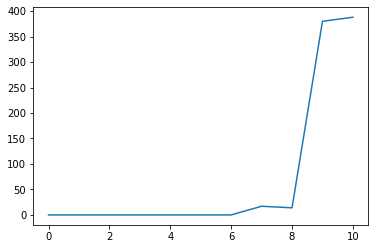

In [209]:
plt.plot(summary['pass_top5_distant_vs_core_cut'])
print(summary['pass_top5_distant_vs_core_cut'])

## What smoothed power snr do these pulses correspond to?

In [210]:
datafile='/home/ubuntu/kp/data/2023July3-overnight-software-trigger/overnight1688446317.7488484.dat'
#records=parsefile(datafile,end_ind=704*10)
records=parsefile(datafile)

In [211]:
config='/home/ubuntu/kp/lwa-cosmic-rays/simulation_configs/config_preliminary_cuts-sim500B.yml'
with open(config, 'r') as file:
    configuration=yaml.safe_load(file)
    
#pulse=configuration['pulse']
#veto_thresh=configuration['veto_thresh']
#ok_vetos_fname=configuration['ok_vetos_fname']
pulse_antennas=configuration['pulse_antennas']
#pulse_antnames_no_pol=[name[:-1] for name in pulse_antennas]

print(pulse_antennas)

#TODO make it inject the signal in a copy so I don't have to reload records
#records=inject_simulation(records,pulse_antennas,pulse,ok_vetos_fname,veto_thresh)

['LWA-081B', 'LWA-082B', 'LWA-109B', 'LWA-111B', 'LWA-116B', 'LWA-120B', 'LWA-122B', 'LWA-149B', 'LWA-151B', 'LWA-153B']


In [212]:
print(configuration.keys())
minimum_ok_power=configuration['minimum_ok_power']
maximum_ok_power=configuration['maximum_ok_power']
minimum_ok_kurtosis=configuration['minimum_ok_kurtosis']
maximum_ok_kurtosis=configuration['maximum_ok_kurtosis']

dict_keys(['datadir', 'outdir', 'stop_index', 'array_map_filename', 'filter', 'maximum_ok_power', 'minimum_ok_power', 'minsnr', 'minimum_ok_kurtosis', 'maximum_ok_kurtosis', 'minmaxstrengthratio', 'mintop5ratio', 'minstrongdetections', 'min_power_ratio', 'max_power_ratio', 'simulation', 'pulse', 'pulse_antennas', 'veto_thresh', 'ok_vetos_fname'])


In [213]:
events=distinguishevents(records,200)
complete_events=[event for event in events if len(event)==704]


In [214]:
mapping.antpol_to_fpga('LWA-355','A')

(7, 60)

In [215]:
all_ants_in_sim=pulse_antennas+[string[:-1]+'A' for string in pulse_antennas]  #make a list with both polarizations
print(all_ants_in_sim)
for name in all_ants_in_sim:
    snap,chan= mapping.antpol_to_fpga(name[:-1],name[-1])
    print(snap,chan)

['LWA-081B', 'LWA-082B', 'LWA-109B', 'LWA-111B', 'LWA-116B', 'LWA-120B', 'LWA-122B', 'LWA-149B', 'LWA-151B', 'LWA-153B', 'LWA-081A', 'LWA-082A', 'LWA-109A', 'LWA-111A', 'LWA-116A', 'LWA-120A', 'LWA-122A', 'LWA-149A', 'LWA-151A', 'LWA-153A']
7 5
7 35
7 15
7 19
7 25
7 33
5 49
7 49
7 53
8 13
7 4
7 34
7 14
7 18
7 24
7 32
5 48
7 48
7 52
8 12


In [216]:
#this cell took less than one minute to run on all the data
injected_pulses=[0,100,200,300,400,500]

snr_windows=np.zeros((len(complete_events),len(all_ants_in_sim),len(injected_pulses)))

snr_totals=np.zeros((len(complete_events),len(all_ants_in_sim),len(injected_pulses)))
peak_indices_total=np.zeros((len(complete_events),len(all_ants_in_sim),len(injected_pulses)))
#pass_antenna_cuts=np.zeros

for e,event_indices in enumerate(complete_events):
    event=[records[i] for i in event_indices]
    selected_antennas=[]
    for a,name in enumerate(all_ants_in_sim):
        snap,chan = mapping.antpol_to_fpga(name[:-1],name[-1])
        for r in event: #find the record
            if r['board_id']==snap and r['antenna_id']==chan:
                timeseries=r['data']
                sample=timeseries[2500]
                for p, pulse in enumerate(injected_pulses):
                    #add pulse
                    if np.abs(sample+pulse)<512:
                        timeseries[2500]=sample+pulse

                    else:
                        timeseries[2500]=512
                    #get snrs
                    convolved=signal.convolve(timeseries,h,mode='valid')
                    powertimeseries=np.square(convolved)
                    smoothed=signal.convolve(powertimeseries,(1/4)*np.ones(4),mode='valid')
                    noise=np.mean(smoothed[:2000])
                    peak_index_total=np.argmax(smoothed)
                    peak_index_window=2480+np.argmax(smoothed[2480:2490])
                    peak_total=smoothed[peak_index_total]
                    peak_window=smoothed[peak_index_window]
                    snr_total=peak_total/noise
                    snr_window=peak_window/noise
                    
                    #save snrs in arrays
                    snr_windows[e,a,p]=snr_window
                    snr_totals[e,a,p]=snr_total
                    peak_indices_total[e,a,p]=peak_index_total
                    #other things to do in the future-- save the peak values, check if antenna cuts pass
                    
                    #reset timeseries to original value
                    timeseries[2500]=sample

In [256]:
first=records[0]
last=records[-1]
print(first['timestamp']*(1/1.963e8))
print(last['timestamp']*(1/1.963e8))

1685866709.7344663
1685897079.722213


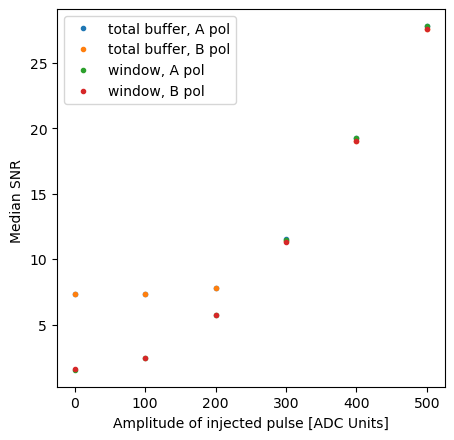

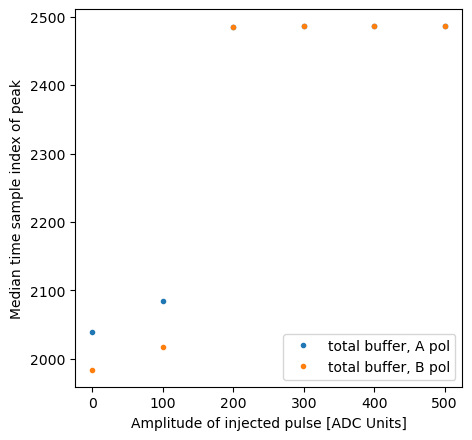

In [253]:
median_over_all_ants_snapshots=[np.median(snr_windows[:,:,p]) for p in range(len(injected_pulses))]
median_over_all_Aants_snapshots=[np.median(snr_windows[:,10:,p]) for p in range(len(injected_pulses))]
median_over_all_Bants_snapshots=[np.median(snr_windows[:,:10,p]) for p in range(len(injected_pulses))]

median_over_all_ants_snapshots_totalbuffersnr=[np.median(snr_totals[:,:,p]) for p in range(len(injected_pulses))]
median_over_all_Aants_snapshots_totalbuffersnr=[np.median(snr_totals[:,10:,p]) for p in range(len(injected_pulses))]
median_over_all_Bants_snapshots_totalbuffersnr=[np.median(snr_totals[:,:10,p]) for p in range(len(injected_pulses))]

median_over_all_ants_snapshots_peakindex=[np.median(peak_indices_total[:,:,p]) for p in range(len(injected_pulses))]
median_over_all_Aants_snapshots_peakindex=[np.median(peak_indices_total[:,10:,p]) for p in range(len(injected_pulses))]
median_over_all_Bants_snapshots_peakindex=[np.median(peak_indices_total[:,:10,p]) for p in range(len(injected_pulses))]

plt.figure(figsize=(5,5),dpi=100)
plt.plot(injected_pulses,median_over_all_Aants_snapshots_totalbuffersnr,'.',label='total buffer, A pol')
plt.plot(injected_pulses,median_over_all_Bants_snapshots_totalbuffersnr,'.',label='total buffer, B pol')
plt.plot(injected_pulses,median_over_all_Aants_snapshots,'.',label='window, A pol')
plt.plot(injected_pulses,median_over_all_Bants_snapshots,'.',label='window, B pol')
plt.legend()
plt.xlabel("Amplitude of injected pulse [ADC Units]")
plt.ylabel("Median SNR ")

plt.figure(figsize=(5,5),dpi=100)
plt.plot(injected_pulses,median_over_all_Aants_snapshots_peakindex,'.',label='total buffer, A pol')
plt.plot(injected_pulses,median_over_all_Bants_snapshots_peakindex,'.',label='total buffer, B pol')
plt.xlabel("Amplitude of injected pulse [ADC Units]")
plt.ylabel("Median time sample index of peak")
plt.legend()
#plt.ylim(2480,2490)

In [218]:
print(injected_pulses)
print(pulses[Apolfiles])

[0, 100, 200, 300, 400, 500]
[100. 200. 300. 400. 500.]


Text(0.5, 1.0, 'Version 2 total cut')

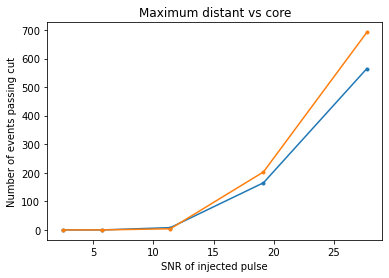

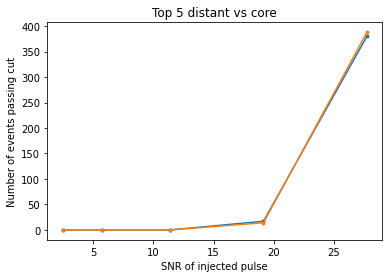

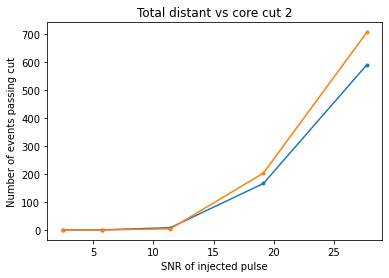

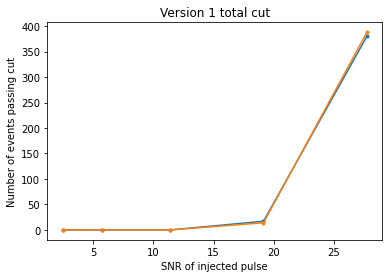

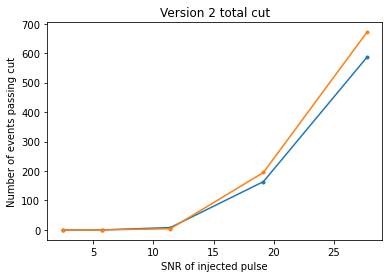

In [219]:
plt.figure()
plt.plot(median_over_all_ants_snapshots[1:],(summary['pass_max_distant_vs_core_cut'][Apolfiles]),'.-')
plt.plot(median_over_all_ants_snapshots[1:],(summary['pass_max_distant_vs_core_cut'][Bpolfiles]),'.-')
plt.xlabel('SNR of injected pulse')
plt.ylabel('Number of events passing cut')
plt.title('Maximum distant vs core')

plt.figure()
plt.plot(median_over_all_ants_snapshots[1:],(summary['pass_top5_distant_vs_core_cut'][Apolfiles]),'.-')
plt.plot(median_over_all_ants_snapshots[1:],(summary['pass_top5_distant_vs_core_cut'][Bpolfiles]),'.-')
plt.xlabel('SNR of injected pulse')
plt.ylabel('Number of events passing cut')
plt.title('Top 5 distant vs core')

plt.figure()
plt.plot(median_over_all_ants_snapshots[1:],(summary['pass_distant_vs_core_cut2'][Apolfiles]),'.-')
plt.plot(median_over_all_ants_snapshots[1:],(summary['pass_distant_vs_core_cut2'][Bpolfiles]),'.-')
plt.xlabel('SNR of injected pulse')
plt.ylabel('Number of events passing cut')
plt.title('Total distant vs core cut 2')

plt.figure()
plt.plot(median_over_all_ants_snapshots[1:],(summary['total_selected_v1'][Apolfiles]),'.-')
plt.plot(median_over_all_ants_snapshots[1:],(summary['total_selected_v1'][Bpolfiles]),'.-')
plt.xlabel('SNR of injected pulse')
plt.ylabel('Number of events passing cut')
plt.title('Version 1 total cut')


plt.figure()
plt.plot(median_over_all_ants_snapshots[1:],(summary['total_selected_v2'][Apolfiles]),'.-')
plt.plot(median_over_all_ants_snapshots[1:],(summary['total_selected_v2'][Bpolfiles]),'.-')
plt.xlabel('SNR of injected pulse')
plt.ylabel('Number of events passing cut')
plt.title('Version 2 total cut')


## What is the SNR of pure noise, and did it change over the night?

In [245]:
#this cell took 2 minutes to run on all the data
snrs=np.zeros((704,1000))
for e,event_indices in enumerate(complete_events):
    event=[records[i] for i in event_indices]
    
    for r in event:
        timeseries=r['data']
        snap_zero_indexed=r['board_id']-1
        snapinput=r['antenna_id']
        total_ant_id=(64*snap_zero_indexed)+snapinput

        convolved=signal.convolve(timeseries,h,mode='valid')
        powertimeseries=np.square(convolved)
        smoothed=signal.convolve(powertimeseries,(1/4)*np.ones(4),mode='valid')
        noise=np.mean(smoothed[:2000])
        peak_index_total=np.argmax(smoothed)
        peak_total=smoothed[peak_index_total]
        snr=peak_total/noise
        snrs[total_ant_id,e]=snr


In [247]:
print(np.median(snrs))
print(np.mean(snrs))

7.268885654146789
7.511071507802886


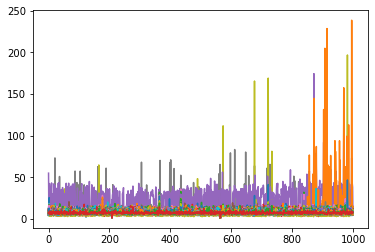

In [249]:
for i in range(704):
    plt.plot(snrs[i])

(0.0, 15.0)

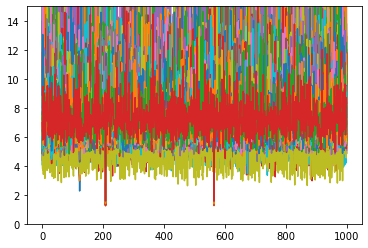

In [251]:
for i in range(704):
    plt.plot(snrs[i])
plt.ylim(0,15)

## Plot some examples

In [203]:
#plot_timeseries(event,pulse_antennas,zoom='peak')


In [204]:
#plot_power_timeseries(event,pulse_antennas,zoom='peak',Filter1=h,Filter2=(1/4)*np.ones(4))
